In [20]:
import h5py
import numpy as np
from numpy import ma
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cm
#matplotlib.rcParams.update({'font.size': 15})
mpl.rcParams.update({'figure.dpi': 200})
mpl.rcParams.update({'figure.figsize': (3,2)})
import pandas as pd
import seaborn as sns
from copy import deepcopy

import sys
import os
import subprocess
import glob
from collections import defaultdict
import scipy as sp
from scipy import special
from itertools import product

from scipy.io import savemat

In [30]:
temp = 0.01
depth = 1000
files = glob.glob(f"/home/ian/Documents/Data/MD_LV_paper_data/rrlogin/*_t-{temp}*")

In [31]:
len(files)

100

In [32]:
for i, f in enumerate(sorted(files)):
    with h5py.File(f, "r") as f:
        if i == 0:
            norm = f["data"]["Norm"][:]
            MSD = f["data"]["MSD"][:]
            time = f["data"]["time"][:]
        else:
            norm += f["data"]["Norm"][:]
            MSD += f["data"]["MSD"][:]

In [33]:
MSD.shape

(11, 1000)

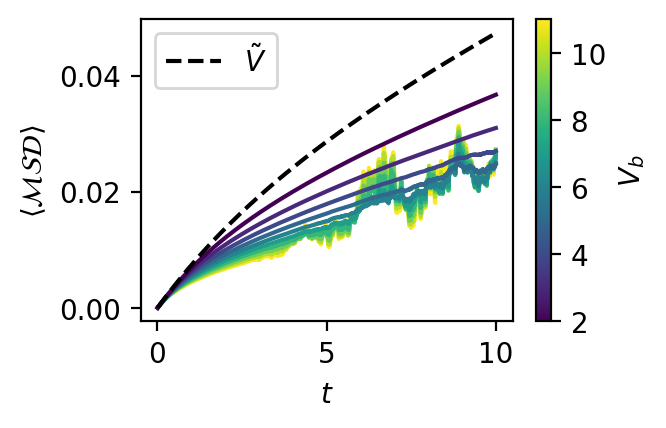

In [34]:
dVs = np.linspace(2.0, 11.0, 10)

cmap = cm.viridis
nor = colors.Normalize(vmin=dVs[0], vmax=dVs[-1])

sm = cm.ScalarMappable(cmap=cmap, norm=nor)

for i in np.arange(len(MSD)):
    M = norm[i]/100_000_000
    mask = MSD[i]/norm[i]
    # mask = np.where(np.abs(M-1) < 0.01, mask, np.nan)
    # nans = np.argwhere(np.isnan(mask))
    if i == len(MSD) - 1:
        color = "k"
        plt.plot(time[:depth], mask[:depth], "--", color=color, label=r"$\tilde V$")
    else:
        color = cmap(nor(dVs[9-i]))
        plt.plot(time[:depth], mask[:depth], "-", color=color)
    
plt.legend()

plt.colorbar(sm, label=r"$V_b$")
plt.ylabel(r"$\langle \mathcal{MSD} \rangle$")
plt.xlabel(r"$t$")
plt.savefig(f"/home/ian/Documents/Data/MD_LV_paper_figures/hertz_{temp}_{depth}_MSD.pdf", bbox_inches='tight')
# plt.yscale('log')
# plt.xscale('log')

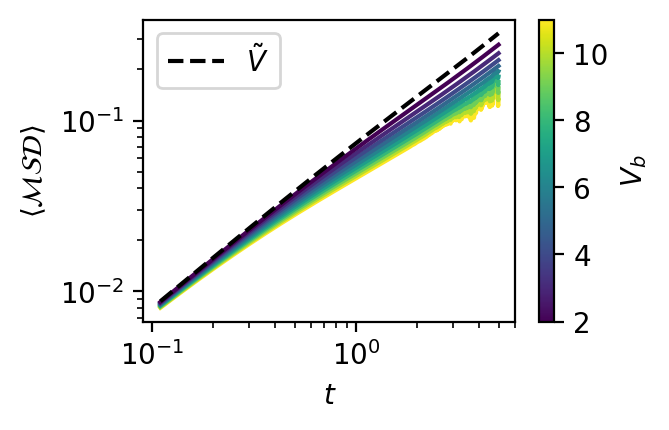

In [15]:
dVs = np.linspace(2.0, 11.0, 10)

cmap = cm.viridis
nor = colors.Normalize(vmin=dVs[0], vmax=dVs[-1])

sm = cm.ScalarMappable(cmap=cmap, norm=nor)

for i in np.arange(len(MSD)):
    M = norm[i]/100_000_000
    mask = MSD[i]/norm[i]
    # mask = np.where(np.abs(M-1) < 0.01, mask, np.nan)
    # nans = np.argwhere(np.isnan(mask))
    if i == len(MSD) - 1:
        color = "k"
        plt.plot(time[10:500], mask[10:500], "--", color=color, label=r"$\tilde V$")
    else:
        color = cmap(nor(dVs[9-i]))
        plt.plot(time[10:500], mask[10:500], "-", color=color)
    
plt.legend()

plt.colorbar(sm, label=r"$V_b$")
plt.ylabel(r"$\langle \mathcal{MSD} \rangle$")
plt.xlabel(r"$t$")
plt.yscale('log')
plt.xscale('log')
plt.savefig("/home/ian/Documents/Data/MD_LV_paper_figures/hertz_MSD_loglog.pdf", bbox_inches='tight')

In [59]:
nans

array([], shape=(0, 1), dtype=int64)

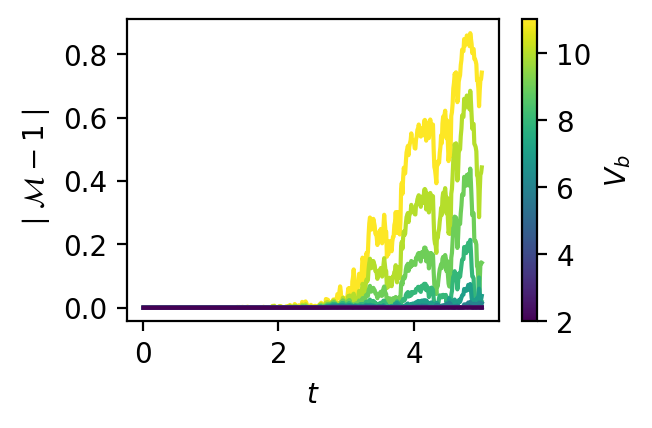

In [18]:
dVs = np.linspace(2.0, 11.0, 10)

cmap = cm.viridis
nor = colors.Normalize(vmin=dVs[0], vmax=dVs[-1])

sm = cm.ScalarMappable(cmap=cmap, norm=nor)

for i in range(len(MSD)-1):
    M = norm[i]/100_000_000
    plt.plot(time[:depth], np.abs(M-1)[:depth], color=cmap(nor(dVs[9-i])))

# plt.yscale('log')
plt.colorbar(sm, label=r"$V_b$")
plt.ylabel(r"$\mid \mathcal{M} - 1 \mid$")
plt.xlabel(r"$t$")
plt.savefig("/home/ian/Documents/Data/MD_LV_paper_figures/hertz_M1.pdf", bbox_inches='tight')

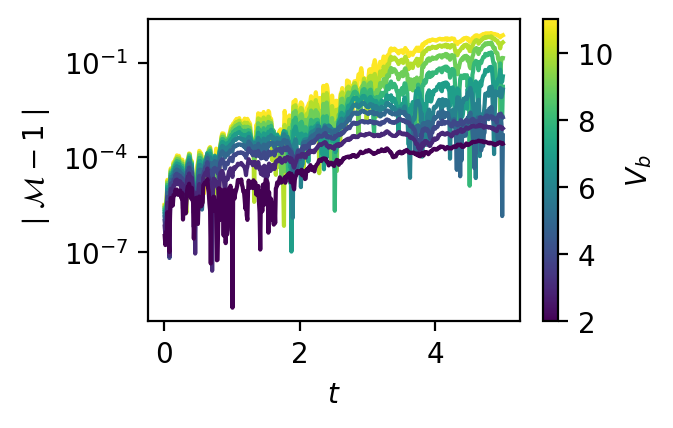

In [19]:
dVs = np.linspace(2.0, 11.0, 10)

cmap = cm.viridis
nor = colors.Normalize(vmin=dVs[0], vmax=dVs[-1])

sm = cm.ScalarMappable(cmap=cmap, norm=nor)

for i in range(len(MSD)-1):
    M = norm[i]/100_000_000
    plt.plot(time[:depth], np.abs(M-1)[:depth], color=cmap(nor(dVs[9-i])))

# plt.yscale('log')
plt.colorbar(sm, label=r"$V_b$")
plt.ylabel(r"$\mid \mathcal{M} - 1 \mid$")
plt.xlabel(r"$t$")
plt.yscale('log')
plt.savefig("/home/ian/Documents/Data/MD_LV_paper_figures/hertz_M1_ylog.pdf", bbox_inches='tight')